# Transport in a Biphenylene 2D Network

### Import Packages and Initialization

In [15]:
try:
    import numpy as np
except:
    raise Exception("Import of Numpy Module Failed")

try: 
    import ase
    from ase import io
    from ase.visualize import view
    import ase.build
    from ase.data import pubchem
    from ase.visualize.plot import plot_atoms
    from ase import Atoms
    from ase.build import attach
except:
    raise Exception("Import of ASE Module Failed")

try:
    import numpy as np
    from numpy.linalg import inv
except:
    raise Exception("Importing Math Packages Failed")

try:
    import matplotlib.pyplot as plt
    from ase import io
except:
    raise Exception("Importing Plotting Packages Failed")

In [16]:
%matplotlib inline

### Basic Constants

In [17]:
global a, cut, vpppi

a = 1.46 # C-C distance
cut = a + 0.3
Vpppi = -2.7 # eV

### Configure system of Atoms

<Axes: >

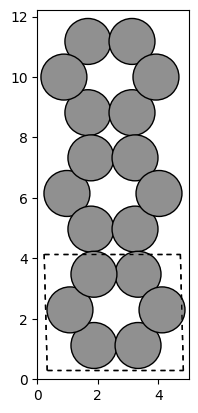

In [26]:
from Configure import Atoms

#file = "0Biphenylene"
#file = "1Biphenylene"
#file = "2Biphenylene"
file = "3Biphenylene"
#file = "3x2Biphenylene"
atoms, xyz = Atoms(X = 0, Y = 0, preset = file+".xyz")

from ase.visualize import view
view(atoms)

plot_atoms(atoms)


### Get the Hamiltonian, on-site Hamiltonians, and Hopping sub-matrices

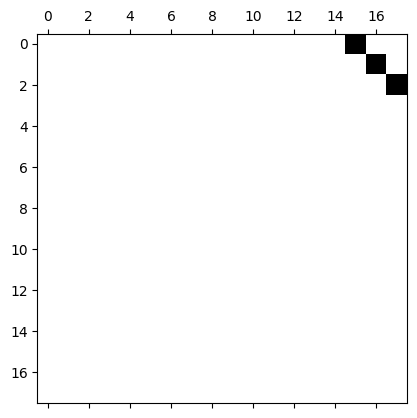

In [27]:
from Hamiltonians import hamiltonian, hamiltonian2, SplitHam

# hL,VL,hR,VR,hD = SplitHam(H = Hbig, nL = 2, nR = 2)

H = hamiltonian2(xyz1 = xyz, xyz2 = xyz)
HopX = hamiltonian2(atoms.positions,atoms.positions + atoms.cell[0])
HopY = hamiltonian2(atoms.positions,atoms.positions + atoms.cell[1])

plt.spy(HopX)

## Calculate band structure for Biphenylene (2D) with the simple tight-binding model

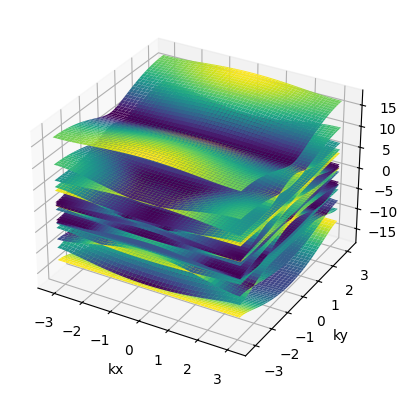

In [28]:
from Structure import BandStructure2D, BandStructure1D

BandStructure2D(H, HopX, HopY)

### 1D bandstructures of $k_x$ and $k_y$

In [ ]:
#BandStructure1D(H, HopX)

In [30]:
#BandStructure1D(H, HopY)

## Implement transverse k-point sampling

### Transmission

In [31]:
from SelfEnergies import recursion

def transmision(hL, hR, VL, VR, hD, E):


    Sigma_L, _ = recursion(hL, VL, E)
    _, Sigma_R = recursion(hR, VR, E)

    #Calculting the grey box in figure 17.b (hD is the grey box without the self energies)
    t_l = hL.shape[0] #top left matrix size
    b_r = hR.shape[0] #bootom right matrix size
    
    # Make sure hD is complex so we can add the self energies
    hD = hD.astype(np.complex128)

    hD[:t_l, :t_l] += Sigma_L
    hD[-b_r:, -b_r:] += Sigma_R

    #return hD

    eta = 0.001
    z = np.identity(len(hD))*(E + 1j*eta)

    #calculating Greens matrix
    G_D = np.linalg.inv(z-hD)
    G_D_dagger = np.transpose(np.conj(G_D))

    #calculating the Gamma matrices
    Gamma_R = -2*np.imag(Sigma_R)
    Gamma_L = -2*np.imag(Sigma_L)


    #creating the full gamma matrices
    Gamma_R_full = np.zeros_like(hD, dtype=np.complex128)
    Gamma_L_full = np.zeros_like(hD, dtype=np.complex128)
    small_rows_R, small_cols_R = Gamma_R.shape
    small_rows_L, small_cols_L = Gamma_L.shape

    Gamma_L_full[:small_rows_L, :small_cols_L] = Gamma_L
    Gamma_R_full[-small_rows_R:, -small_cols_R:] = Gamma_R

    T = np.trace(Gamma_R_full @ G_D  @ Gamma_L_full @ G_D_dagger)

    return T


In [33]:
E = np.linspace(-3*Vpppi,3*Vpppi,100)

T = np.zeros_like(E, dtype=np.complex128)

for i in range(0,100,1):
    T[i] = transmision(hL, hR, VL.T, VR.T, hD, E[i])
    
plt.plot(E,T,color = "DarkBlue",label = "")

# giving a title to my graph
plt.title('T vs E')

plt.show()

NameError: name 'hL' is not defined